# Homework 9: Fast Fourier Transforms

## Objectives

In this homework we will learn how to calculate the FFT and extract information from it using functions from `numpy.fft`.  We will also prepare for the lab by thinking about the Fourier transform as more than just relating the frequency and time domains.  In fact, it is a very generic tool and can be used to speed up the numerical computation in many types of problems.

## Initialization

As always you should add initialization to the top of your notebook.

In [11]:
### BEGIN SOLUTION
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
### END SOLUTION

## Exploring the FFT

To begin our exploration of the FFT consider a simple signal containing two frequencies written as

$$ h(t) = a_1 \sin(2\pi f_1 t) + a_2 \sin(2\pi f_2 t). $$

Let $a_1 = 1$, $a_2 = 1.5$, $f_1=10\,\mathrm{Hz}$, and $f_2=15\,\mathrm{Hz}$.  Here we will sample the signal over a time period of $1\,\mathrm{s}$ at different sample rates.

Sample the signal over a total time inteveral of 1 second using 41 samples.  Calculate the FFT of this sampled signal using `np.fft.fft` and store the result: I will call the Fourier transform of our signal `H`.  Next calculate the inverse FFT of `H` using `np.fft.ifft`.  This should reproduce the original signal.  Produce a quick plot of the original signal and the one calculated by applying the FFT and then an inverse FFT. [*Note:* We use an odd number of steps because it makes some of the calculations below easier.]

C:\Users\James\Anaconda3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


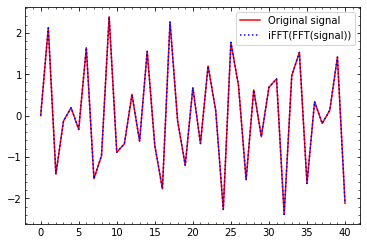

In [12]:
### BEGIN SOLUTION
N = 41
ts = np.arange(N)/N
hs = 1.0*np.sin(2*np.pi*10*ts) + 1.5*np.sin(2*np.pi*15*ts)
Hs = np.fft.fft(hs)
hs2 = np.fft.ifft(Hs)

plt.plot(hs, 'r-', label='Original signal')
plt.plot(hs2, 'b:', label='iFFT(FFT(signal))')
plt.legend()
### END SOLUTION

### Note:

You should find the signal from the inverse FFT reproduces the original signal.  This is not always the case with FFT implementations!  Different implementations of the FFT normalize things in different ways and may require you to renormalize the results.  The implementations in NumPy and SciPy do this for you, but others may not.  You should always check how the normalization is handled in the library you are using.

### Amplitude

The FFT of our signal should extract the dominant frequencies and their amplitudes. There are a number of details to understand when calculating this. First notice that the amplitude in `H` is complex.  This is due to the fact that we have used complex exponentials (ie, complex functions) to represent the sinusoids.  Since our signal is real we should really plot the absolute value of the amplitude instead of just the amplitude itself.  (In fact, when we plot the amplitude it only plots the real part throwing away the information in the imaginary part. You should also verify that `np.abs` returns the amplitude of a complex number.)

For our signal, we know what frequencies and amplitudes should appear.  To calculate the frequencies of the FFT we can use `np.fft.fftfreq`.  Note that if you pass the sampling interval ($\Delta t$) to this function it will return the frequencies in the correct units.

Produce a quick plot of the amplitude versus the frequency.  Do this in the "naive" way using the frequencies directly from `fftfreq`. Looking closely, you may notice the plot has some odd behavior.

Text(0.5,1,'Fourier transform of signal')

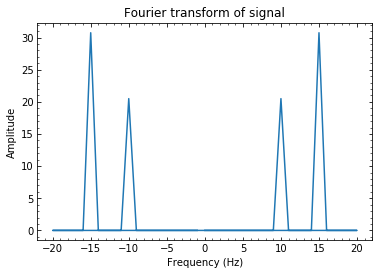

In [13]:
### BEGIN SOLUTION
fs = np.fft.fftfreq(N, 1/N)
plt.plot(fs, np.abs(Hs))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Fourier transform of signal")
### END SOLUTION

#### Reorganizing the FFT

The amplitudes correspond to frequencies in a particular order.  As seen in the example for this week, the information can be reordered using `np.fft.fftshift`.

Produce a quick plot of the appropriately shifted absolute value of the amplitude versus the also properly shifted frequencies.  You should find there are peaks at the frequencies used to construct the signal.

Text(0.5,1,'Fourier transform of signal')

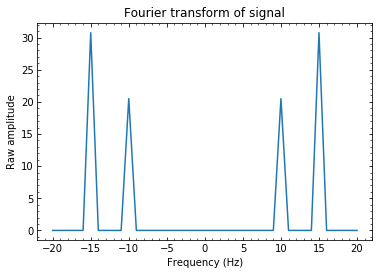

In [14]:
### BEGIN SOLUTION
Hs_shift = np.fft.fftshift(Hs)
fs_shift = np.fft.fftshift(fs)
plt.plot(fs_shift, np.abs(Hs_shift))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Raw amplitude")
plt.title("Fourier transform of signal")
### END SOLUTION

Your plot should only have non-zero amplitudes at the expected frequencies.  However, it has non-zero amplitudes at both positive and negative frequencies.  These amplitudes should be combined.  Add the absolute values of the positive and negative frequencies.  Produce a quick plot of this new amplitude versus the positive frequencies.  You can exclude the zero frequency in this calculation and plot. [*Hint: review the example from this week for an example of this.*]

Text(0.5,1,'Fourier transform of signal')

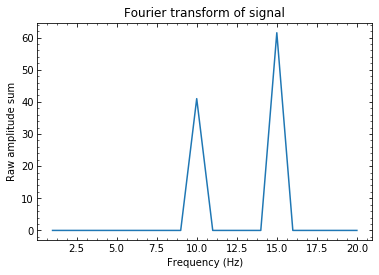

In [15]:
### BEGIN SOLUTION
ind = np.arange(1,N//2+1)
Hs_pos = np.abs(Hs[ind]) + np.abs(Hs[-ind])
fs_pos = fs[ind]
plt.plot(fs_pos, Hs_pos)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Raw amplitude sum")
plt.title("Fourier transform of signal")
### END SOLUTION

#### Normalizing the FFT

We should now have found that we only have contributions at the two positive frequencies used to create the signal.  The amplitudes we calculated should also equal the amplitudes used to create the signal, but they do not!  Why not?  Even though calculating the FFT then the inverse FFT does return the normalized result, **the intermediate result is not properly normalized**.  Again, this detail depends on the FFT library used and the documentation for `np.fft.fft`, in particular the examples, show that to normalize the FFT we need to divide by the number of samples, `N`.  This step is only necessary if we are interested in the values returned by `np.fft.fft`.  We should *not* renormalize the results if we are just going to transform form the back to the time domain.

Renormalize the amplitude calculated in the previous part.  Print the amplitudes at the two frequencies used to calculate the original signal.  These should agree with the values used in constructing the signal.  Also produce a quick plot of the normalized amplitude versus frequency as in the previous question.

Text(0.5,1,'Fourier transform of signal')

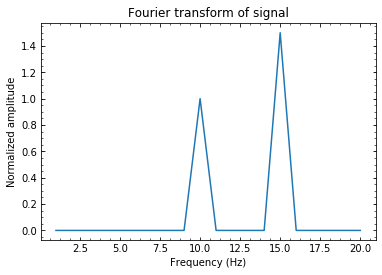

In [16]:
### BEGIN SOLUTION
plt.plot(fs_pos, Hs_pos/N)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized amplitude")
plt.title("Fourier transform of signal")
### END SOLUTION

In [18]:
len(Hs)

41

### Resolution Dependence

The analysis we performed above used a rather small number of time steps.  This leads to a rather large step size for the frequency.  This was sufficient for the simple signal we studied since the frequencies in the signal corresponded to frequencies sampled by the FFT.  If this had not been the case then the exact frequencies and amplitudes would not have been reproduced.

How can we improve the resolution in the frequency domain?  Our first guess might be to increase the sampling rate by using more time steps.

Again use the signal studied above but now sample the 1 second signal using 401 time steps.  Produce a quick plot of the normalized amplitude versus the positive frequencies as in the previous plot.  You should find this increases the maximum frequency, but does not increase the resolution in the frequency domain.

Text(0.5,1,'Fourier transform of signal')

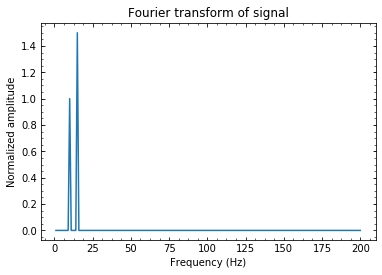

In [7]:
### BEGIN SOLUTION
N = 401
ts = np.arange(N)/N
hs = 1.0*np.sin(2*np.pi*10*ts) + 1.5*np.sin(2*np.pi*15*ts)
Hs = np.fft.fft(hs)
fs = np.fft.fftfreq(N, 1/N)

ind = np.arange(1,N//2+1)
Hs_pos = np.abs(Hs[ind]) + np.abs(Hs[-ind])
fs_pos = fs[ind]

plt.plot(fs_pos, Hs_pos/N)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized amplitude")
plt.title("Fourier transform of signal")
### END SOLUTION